In [ ]:
# 6, 1, 1, 12

In [2]:
import numpy as np

In [3]:
from IPython.display import HTML

HTML("<style>div.output_area pre { font-family: 'Courier New', monospace; }</style>")

In [4]:
from apad_env import APADEnv

In [ ]:
env = APADEnv()
obs, _ = env.reset()
print(env._is_valid_placement(7, 0, 1, 13))
# print(env.encode_action(7,0,1,13))
print(env.encode_action(7, 1, 3, 42))
env._place_piece_components(7, 1, 3, 42)
# env._place_piece_components(6, 0, 0, 1)
# env.visualize()

In [ ]:
env = APADEnv()
obs, _ = env.reset()
coords = env._get_piece_coords(7, 0, 1)
print("piece", coords)
row, col = divmod(12, env.grid_size)
print("location", row, col)
print(env._is_valid_placement(7, 0, 1, 12))
env._place_piece_components(7, 0, 1, 12)
# env._place_piece_components(6, 0, 0, 1)
print(env.grid)
env.visualize()

## Small action space with no islands

In [ ]:
env = APADEnv()
obs, info = env.reset()
# valid_actions = np.where(info["action_mask"])[0]
# env._place_piece(env.encode_action(0,1,2,19))
# env._place_piece(env.encode_action(2,0,3,22))
# env._place_piece(env.encode_action(3,0,1,28))
# env._place_piece(env.encode_action(5,0,3,3))
# env._place_piece(env.encode_action(6,0,1,8))
# env._place_piece(env.encode_action(7,1,0,24))
obs, reward, terminated, truncated, info = env.step(env.encode_action(0, 1, 2, 19))
obs, reward, terminated, truncated, info = env.step(env.encode_action(2, 0, 3, 22))
obs, reward, terminated, truncated, info = env.step(env.encode_action(3, 0, 1, 28))
obs, reward, terminated, truncated, info = env.step(env.encode_action(5, 0, 3, 3))
obs, reward, terminated, truncated, info = env.step(env.encode_action(6, 0, 1, 8))
obs, reward, terminated, truncated, info = env.step(env.encode_action(7, 1, 0, 24))
env.visualize()
valid_actions = np.where(info["action_mask"])[0]
print(len(valid_actions))

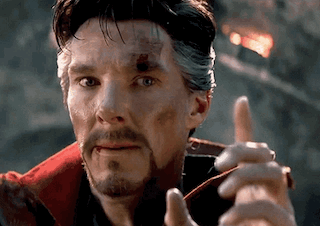

In [ ]:
action = np.random.choice(valid_actions)
print(env.decode_action(action))

In [ ]:
valid_actions = np.where(info["action_mask"])[0]
print(len(valid_actions))

In [ ]:
obs, reward, terminated, truncated, info = env.step(env.encode_action(1, 1, 1, 0))
print(truncated)
env.visualize()

adsf

In [7]:
def test_random_game(env, verbose=False):
    obs, info = env.reset()
    done = False
    steps = 0
    total_reward = 0

    while not done:
        valid_actions = np.where(info["action_mask"])[0]
        if len(valid_actions) == 0:
            break
        action = np.random.choice(valid_actions)

        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        steps += 1
        total_reward += reward

        if verbose:
            print(f"Step {steps}: {env.decode_action_verbose(action)}, reward={reward}")

    return steps, total_reward

In [8]:
env = APADEnv()
for _ in range(10):
    steps, total_reward = test_random_game(env)
    print(f"Steps: {steps}, Reward: {total_reward}")

Steps: 3, Reward: -3
Steps: 5, Reward: -1
Steps: 2, Reward: -4
Steps: 3, Reward: -3
Steps: 6, Reward: 0
Steps: 3, Reward: -3
Steps: 4, Reward: -2
Steps: 3, Reward: -3
Steps: 4, Reward: -2
Steps: 2, Reward: -4


### Test Simplex Fix in torch/distributions/constraints.py

In [1]:
import torch
from torch.distributions.constraints import simplex

# Create a problematic tensor (like from your error)
test_probs = torch.tensor([[2.0958e-06, 1.0866e-07, 1.8118e-07] + [0.0] * 2749])
test_probs = test_probs / test_probs.sum()  # Normalize

print(f"Sum: {test_probs.sum()}")
print(f"Sum error: {(test_probs.sum() - 1).abs()}")
print(f"Passes simplex check: {simplex.check(test_probs)}")

Sum: 1.0
Sum error: 0.0
Passes simplex check: tensor([True])


### What tensorboard metrics did we save?

In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

event_acc = EventAccumulator(
    "maskable_ppo_logs_4/PPO_12/events.out.tfevents.1750358152.infra04-wg012.eduroam.wireless.umn.edu.18229.15"
)
event_acc.Reload()

# See what metrics were logged
print("Scalars:", event_acc.Tags()["scalars"])
print("Histograms:", event_acc.Tags().get("histograms", []))
print("Text:", event_acc.Tags().get("text", []))

Scalars: ['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/value_loss']
Histograms: []
Text: []
